# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install openweathermapy
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gzip
from pprint import pprint
import json


# Import API key
import config


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
cities_country_code = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city_country_code = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        cities_country_code.append(city_country_code)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
json_data = []
with gzip.open('./city.list.json.gz') as f:
    json_data = json.load(f)
#pprint(json_data)
list_of_cities_in_openweather = [json_data[i]['name'] for i in range(len(json_data))]
list_of_country_codes_in_openweather = [json_data[i]['country'] for i in range(len(json_data))]
cities_countries_in_openweather = [str(list_of_cities_in_openweather[i].lower() + ',' +
                                       list_of_country_codes_in_openweather[i].lower())
                                     for i in range(len(list_of_cities_in_openweather))]
cities_countries_ids = [json_data[i]['id'] for i in range(len(json_data))]
#cities_countries_ids

In [5]:
# suspecting that the list of cities' latitudes may not be that uniform... 
# oh well... should be good enough to prove the point though...

# To ensure the city is in the OpenWeather API, we need to search the list of cities provided:

url_oweathermap = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
base_url = f"{url_oweathermap}appid={config.api_key}&units={units}&q="
#print(f"{base_url})

cities_queried = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp= []
wind_speed = []

# Free version only allows 60 calls per minute; 
# let's break down the cities to be queried into sets of 50
# will call each set per minute, so it will take a total of math.ceil(len(cities) / 50) minutes
print("-----------------------------")
print("Beginning data Retrieval")
print("-----------------------------")    
num_of_queries = 0
max_queries = 50 # in reality we can do 60/min
current_set = 1
for city in cities:
    city_country_string = str(city.lower() + ',' + cities_country_code[cities.index(city)].lower())
    if city_country_string not in cities_countries_in_openweather:
        print('City not found. Skipping...')
        continue
    if(num_of_queries < max_queries):
        city_id = cities_countries_ids[cities_countries_in_openweather.index(city_country_string)]
        url = str(base_url + '&id=' + str(city_id))
        
        response = requests.get(url).json()
        if int(response['cod']) != 200: 
            raise Exception('Something went wrong.\nCode: ' + str(response['cod']) + '; ' + str(response['message']))
        num_of_queries += 1
        print(f" Processing Record {num_of_queries} of Set {current_set} | {city}")
        #print(f"{url}")
        cities_queried.append(city)
        cloudiness.append(int(response['clouds']['all']))
        country.append(str(response['sys']['country']))
        date.append(int(response['dt']))
        humidity.append(int(response['main']['humidity']))
        lat.append(float(response['coord']['lat']))
        lng.append(float(response['coord']['lon']))
        max_temp.append(float(response['main']['temp_max']))
        wind_speed.append(float(response['wind']['speed']))
    else:
        print('Waiting 30 seconds to retrieve the next set of 50 cities')
        time.sleep(30)
        num_of_queries = 0
        current_set += 1
print("-----------------------------")
print("Data Retrieval Done")
print("-----------------------------")

-----------------------------
Beginning data Retrieval
-----------------------------
 Processing Record 1 of Set 1 | dingle
 Processing Record 2 of Set 1 | hobart
 Processing Record 3 of Set 1 | vaini
 Processing Record 4 of Set 1 | new norfolk
 Processing Record 5 of Set 1 | mirnyy
 Processing Record 6 of Set 1 | ushuaia
 Processing Record 7 of Set 1 | lebu
 Processing Record 8 of Set 1 | port macquarie
 Processing Record 9 of Set 1 | jamestown
 Processing Record 10 of Set 1 | saskylakh
 Processing Record 11 of Set 1 | rikitea
 Processing Record 12 of Set 1 | port alfred
 Processing Record 13 of Set 1 | pangnirtung
 Processing Record 14 of Set 1 | los llanos de aridane
 Processing Record 15 of Set 1 | arraial do cabo
 Processing Record 16 of Set 1 | tuatapere
 Processing Record 17 of Set 1 | mackay
 Processing Record 18 of Set 1 | punta arenas
City not found. Skipping...
 Processing Record 19 of Set 1 | russkaya polyana
 Processing Record 20 of Set 1 | barrow
 Processing Record 21 of 

 Processing Record 23 of Set 4 | geraldton
 Processing Record 24 of Set 4 | omboue
 Processing Record 25 of Set 4 | clyde river
City not found. Skipping...
 Processing Record 26 of Set 4 | ahipara
City not found. Skipping...
 Processing Record 27 of Set 4 | christchurch
 Processing Record 28 of Set 4 | tucumcari
 Processing Record 29 of Set 4 | la ronge
 Processing Record 30 of Set 4 | mount gambier
 Processing Record 31 of Set 4 | bolshoye murashkino
 Processing Record 32 of Set 4 | katsuura
 Processing Record 33 of Set 4 | castro
 Processing Record 34 of Set 4 | troitskoye
 Processing Record 35 of Set 4 | maniitsoq
 Processing Record 36 of Set 4 | roald
 Processing Record 37 of Set 4 | tiksi
 Processing Record 38 of Set 4 | ofaqim
 Processing Record 39 of Set 4 | vanimo
 Processing Record 40 of Set 4 | rawson
 Processing Record 41 of Set 4 | hay river
 Processing Record 42 of Set 4 | cherskiy
 Processing Record 43 of Set 4 | ubinskoye
 Processing Record 44 of Set 4 | payakumbuh
 Proc

 Processing Record 45 of Set 7 | west wendover
 Processing Record 46 of Set 7 | vokhtoga
 Processing Record 47 of Set 7 | petrolina
 Processing Record 48 of Set 7 | toamasina
City not found. Skipping...
 Processing Record 49 of Set 7 | ejido
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
 Processing Record 50 of Set 7 | sao joao da barra
Waiting 30 seconds to retrieve the next set of 50 cities
 Processing Record 1 of Set 8 | liaoyang
 Processing Record 2 of Set 8 | lahij
 Processing Record 3 of Set 8 | arman
 Processing Record 4 of Set 8 | bartica
 Processing Record 5 of Set 8 | bata
 Processing Record 6 of Set 8 | hirna
 Processing Record 7 of Set 8 | ola
 Processing Record 8 of Set 8 | minbu
 Processing Record 9 of Set 8 | chinsali
 Processing Record 10 of Set 8 | kostomuksha
 Processing Record 11 of Set 8 | kal
 Processing Record 12 of Set 8 | beringovskiy
 Processing Record 13 of Set 8 | tazovskiy
 Processing Record 14 of Set 8 | sevsk
 Processi

 Processing Record 11 of Set 11 | consuegra
 Processing Record 12 of Set 11 | hengshui
City not found. Skipping...
City not found. Skipping...
 Processing Record 13 of Set 11 | nome
 Processing Record 14 of Set 11 | pedernales
 Processing Record 15 of Set 11 | chara
 Processing Record 16 of Set 11 | manzhouli
 Processing Record 17 of Set 11 | kahului
-----------------------------
Data Retrieval Done
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
results_df = pd.DataFrame({'City': cities_queried,
                          'Cloudiness': cloudiness,
                          'Country': country,
                          'Date': date,
                          'Humidity': humidity,
                          'Lat': lat,
                          'Lng': lng,
                          'Max Temp': max_temp,
                          'Wind Speed': wind_speed})
results_df.to_csv(output_data_file, index=False, encoding='utf-8')

In [7]:
print(results_df.count())

City          517
Cloudiness    517
Country       517
Date          517
Humidity      517
Lat           517
Lng           517
Max Temp      517
Wind Speed    517
dtype: int64


In [8]:
results_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dingle,75,IE,1551974400,70,52.14,-10.27,48.20,8.05
1,hobart,75,AU,1551976214,48,-42.88,147.33,60.80,20.80
2,vaini,40,TO,1551974400,83,-21.20,-175.20,77.00,6.93
3,new norfolk,75,AU,1551976335,48,-42.78,147.06,60.80,20.80
4,mirnyy,32,RU,1551976390,80,61.33,44.54,17.85,16.02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

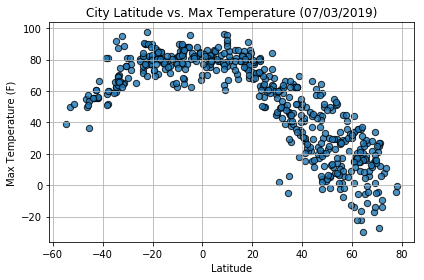

In [9]:
results_df.plot('Lat','Max Temp', kind='scatter', edgecolors='black', s=40, alpha=0.8)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

dates = results_df['Date']
unique_date = list(set([time.gmtime(dates[i]) for i in range(len(dates))]))[0]
unique_date = time.strftime('%d/%m/%Y', unique_date)

plt.title('City Latitude vs. Max Temperature (' + unique_date +')')
plt.tight_layout()
plt.savefig('./output_data/Latitude_vs_maxTemp.png', bbox_inches='tight')
plt.show()

#### Latitude vs. Humidity Plot

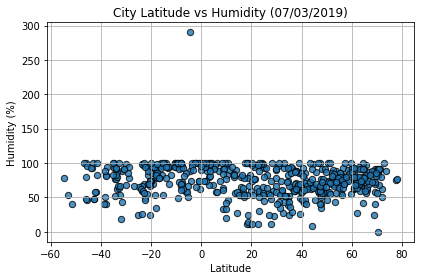

In [10]:
results_df.plot('Lat', 'Humidity', kind='scatter', edgecolors='black', s=40, alpha=0.8)
plt.grid()
plt.title('City Latitude vs Humidity (' + unique_date + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.savefig('./output_data/Latitude_vs_humidity.png', bbox_inches='tight')
plt.show()

#### Latitude vs. Cloudiness Plot

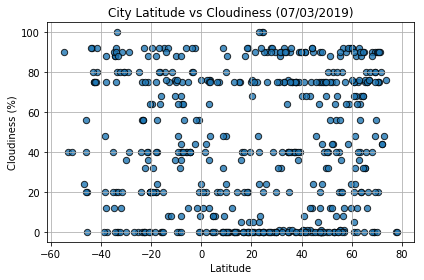

In [11]:
results_df.plot('Lat', 'Cloudiness', kind='scatter', edgecolors='black', s=40, alpha=0.8)
plt.grid()
plt.title('City Latitude vs Cloudiness (' + unique_date + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.savefig('./output_data/Latitude_vs_cloudiness.png', bbox_inches='tight')
plt.show()

#### Latitude vs. Wind Speed Plot

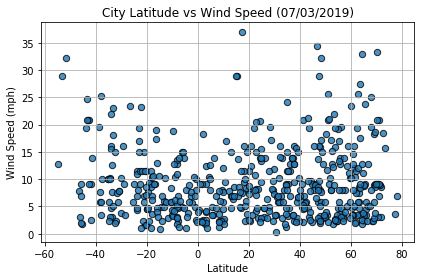

In [12]:
results_df.plot('Lat', 'Wind Speed', kind='scatter', edgecolors='black', s=40, alpha=0.8)
plt.grid()
plt.title('City Latitude vs Wind Speed (' + unique_date + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.savefig('./output_data/Latitude_vs_windSpeed.png', bbox_inches='tight')
plt.show()

In [13]:
# Three observable trends based on the data.

# 1. It certainly does get hotter as one approaches zero latitude
# 2. Cities in the -20 to +20 latitudes had temperatures just as hot as the equator (~80 degrees Fahrenheit)
# 3. As expected, the southern hemisphere is hotter in the Winter than the northern hemisphere